In [32]:
from DynamicModel_Package.DynamicModel2D_Base import DynamicModel2D
import numpy as np
%load_ext autoreload
%autoreload 2

import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.special import comb
import sys
sys.path.append('..') 

from Base.Combo_CC_Base import Combo_CC
from Base.Combo_plot_base import Combo_plot
from Base.Combo_ode_base import Combo_ODE


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def convert_nullcline(expr,variable):
    expr_str = str(expr)
    expr = sp.sympify(expr_str)

    def f (var,pars):
        if len(pars)>0:
            if str(variable)=='x':
                new_dict = {'x':var}
                new_dict.update(pars)
            else:
                new_dict = {'y':var}
                new_dict.update(pars)
        else:
            if str(variable)=='x':
                new_dict = {'x':var}
            else:
                new_dict = {'y':var}
        return expr.subs(new_dict)

    return f

def det_y_fun_x (n):
    y_fun_x = True
    if str(n[1])=='y':
        y_fun_x = False
    return y_fun_x

import sympy.abc as abc
def find_nullclines_and_update (model: DynamicModel2D,dxdt,dydt,variables = [abc.x,abc.y]):
    #dxdt and dydt have to be sympy expressions
    x,y = variables
    nc_x_x = sp.solve(sp.Eq(dxdt,0),x) #result as a function of y
    nc_x_y = sp.solve(sp.Eq(dxdt,0),y) #result as a function of x
    nc_y_x = sp.solve(sp.Eq(dydt,0),x)
    nc_y_y = sp.solve(sp.Eq(dydt,0),y)
    nc_x = []
    nc_y = []
    for n in nc_x_x:
        nc_x.append((n,y))
    for n in nc_x_y:
        nc_x.append((x,n))
    for n in nc_y_x:
        nc_y.append((n,y))
    for n in nc_y_y:
        nc_y.append((x,n))
    print(nc_x)
    print(nc_y)
    for n in nc_x:
        y_fun_x = det_y_fun_x(n)
        if y_fun_x:
            f = convert_nullcline(n[1],x)
        else:
            f = convert_nullcline(n[0],y)
        model.add_nullcline('x',f,model.parameters_x,y_fun_x)
    for n in nc_y:
        y_fun_x = det_y_fun_x(n)
        if y_fun_x:
            f = convert_nullcline(n[1],x)
        else:
            f = convert_nullcline(n[0],y)
        model.add_nullcline('y',f,model.parameters_y,y_fun_x)

    return model

[(0, y), (10*(5*dp0 - sqrt(dp0*(25*dp0 - dp1 - y)))/dp0, y), (10*(5*dp0 + sqrt(dp0*(25*dp0 - dp1 - y)))/dp0, y), (x, -dp0*x**2/100 + dp0*x - dp1)]
[(1, y), (x, 0)]


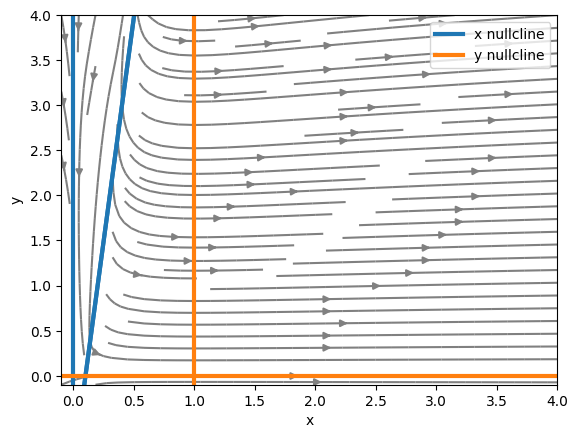

[(-(10000 - 3*(100*dp1 + 100*y)/dp0)/(3*(sqrt(-4*(10000 - 3*(100*dp1 + 100*y)/dp0)**3 + (-2000000 - 2700*epsilon/dp0 + 900*(100*dp1 + 100*y)/dp0)**2)/2 - 1000000 - 1350*epsilon/dp0 + 450*(100*dp1 + 100*y)/dp0)**(1/3)) - (sqrt(-4*(10000 - 3*(100*dp1 + 100*y)/dp0)**3 + (-2000000 - 2700*epsilon/dp0 + 900*(100*dp1 + 100*y)/dp0)**2)/2 - 1000000 - 1350*epsilon/dp0 + 450*(100*dp1 + 100*y)/dp0)**(1/3)/3 + 100/3, y), (-(10000 - 3*(100*dp1 + 100*y)/dp0)/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(-4*(10000 - 3*(100*dp1 + 100*y)/dp0)**3 + (-2000000 - 2700*epsilon/dp0 + 900*(100*dp1 + 100*y)/dp0)**2)/2 - 1000000 - 1350*epsilon/dp0 + 450*(100*dp1 + 100*y)/dp0)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(sqrt(-4*(10000 - 3*(100*dp1 + 100*y)/dp0)**3 + (-2000000 - 2700*epsilon/dp0 + 900*(100*dp1 + 100*y)/dp0)**2)/2 - 1000000 - 1350*epsilon/dp0 + 450*(100*dp1 + 100*y)/dp0)**(1/3)/3 + 100/3, y), (-(10000 - 3*(100*dp1 + 100*y)/dp0)/(3*(-1/2 + sqrt(3)*I/2)*(sqrt(-4*(10000 - 3*(100*dp1 + 100*y)/dp0)**3 + (-2000000 - 2700*epsilon/dp

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

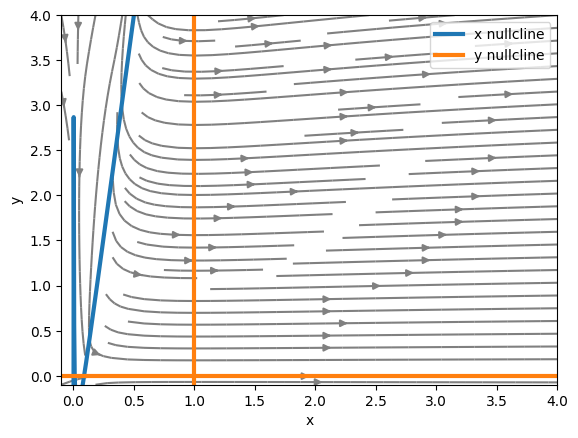

In [3]:
def dxdt_a1 (variables,parameters):
    x = variables['x']
    y = variables['y']
    dp0 = parameters['dp0']
    dp1 = parameters['dp1']
    return x*(dp0*x*(1-x/100)-dp1-y)
def dydt_a1 (variables,parameters):
    x = variables['x']
    y = variables['y']
    return y*(x-1)
x,y,dp0,dp1 = sp.symbols('x y dp0 dp1')
dxdt_a1_sp = x*(dp0*x*(1-x/100)-dp1-y)
dydt_a1_sp = y*(x-1)

archetypea1 = DynamicModel2D('x',dxdt_a1,{'dp0':10,'dp1':1},'y',dydt_a1,{})
archetypea1 = find_nullclines_and_update(archetypea1,dxdt_a1_sp,dydt_a1_sp)
archetypea1.plot_phase_portrait(0,20,20,[-0.1,4],[-0.1,4],['tab:blue','tab:orange'])
plt.show()
def dxdt_a2 (variables,parameters):
    x = variables['x']
    y = variables['y']
    dp0 = parameters['dp0']
    dp1 = parameters['dp1']
    eps = parameters['epsilon']
    return eps+x*(dp0*x*(1-x/100)-dp1-y)
eps = sp.symbols('epsilon')
dxdt_a2_sp = eps+x*(dp0*x*(1-x/100)-dp1-y)
dydt_a2_sp = y*(x-1)
archetypea2 = DynamicModel2D('x',dxdt_a2,{'dp0':10,'dp1':1,'epsilon':0.01},'y',dydt_a1,{})
archetypea2 = find_nullclines_and_update(archetypea2,dxdt_a2_sp,dydt_a2_sp)
archetypea2.plot_phase_portrait(0,20,20,[-0.1,4],[-0.1,4],['tab:blue','tab:orange'])


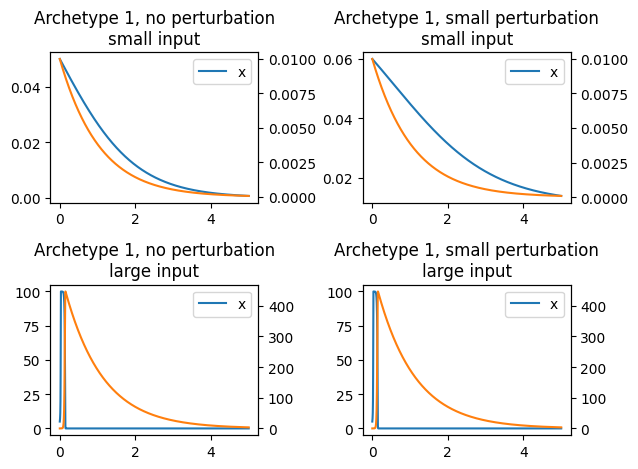

In [5]:

integ_a1_1 = archetypea1.euler_integrate_keep_positive({'x':0.05,'y':0.01,'t':0},5,0.001)
integ_a1_2 = archetypea1.euler_integrate_keep_positive({'x':5,'y':0.01,'t':0},5,0.001)

integ_a2_1 = archetypea2.euler_integrate_keep_positive({'x':0.01+0.05,'y':0.01,'t':0},5,0.001)
integ_a2_2 = archetypea2.euler_integrate_keep_positive({'x':0.01+5,'y':0.01,'t':0},5,0.001)

fig,axs = plt.subplots(ncols = 2, nrows = 2)
axs[0,0].plot(integ_a1_1['t'],integ_a1_1['x'],color = 'tab:blue',label = 'x')
ax = axs[0,0].twinx()
ax.plot(integ_a1_1['t'],integ_a1_1['y'],color = 'tab:orange',label = 'y')
axs[0,0].legend()
axs[0,0].set_title('Archetype 1, no perturbation\nsmall input')

axs[1,0].plot(integ_a1_2['t'],integ_a1_2['x'],color = 'tab:blue',label = 'x')
ax = axs[1,0].twinx()
ax.plot(integ_a1_2['t'],integ_a1_2['y'],color = 'tab:orange',label = 'y')
axs[1,0].legend()
axs[1,0].set_title('Archetype 1, no perturbation\nlarge input')

axs[0,1].plot(integ_a2_1['t'],integ_a2_1['x'],color = 'tab:blue',label = 'x')
ax = axs[0,1].twinx()
ax.plot(integ_a2_1['t'],integ_a2_1['y'],color = 'tab:orange',label = 'y')
axs[0,1].legend()
axs[0,1].set_title('Archetype 1, small perturbation\nsmall input')
 
axs[1,1].plot(integ_a2_2['t'],integ_a2_2['x'],color = 'tab:blue',label = 'x')
ax = axs[1,1].twinx()
ax.plot(integ_a2_2['t'],integ_a2_2['y'],color = 'tab:orange',label = 'y')
axs[1,1].legend()
axs[1,1].set_title('Archetype 1, small perturbation\nlarge input')

fig.tight_layout()


[(0, y), (100 - 100*dp1/(dp0*y) - 100/dp0, y), (x, -100*dp1/(dp0*x - 100*dp0 + 100))]
[(-1, y), (x, 0)]


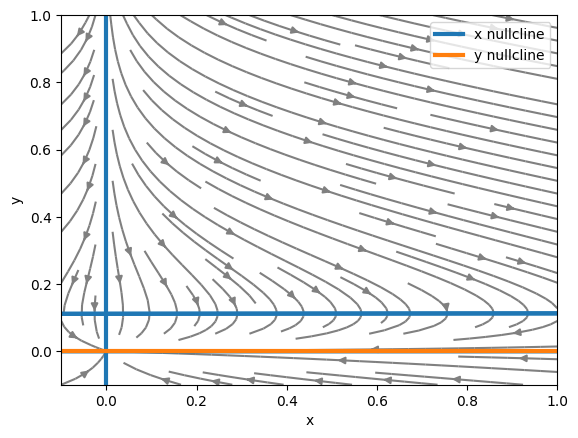

[(10*(5*dp0*y - 5*dp1 - 5*y - sqrt(25*dp0**2*y**2 - 50*dp0*dp1*y + dp0*epsilon*y - 50*dp0*y**2 + 25*dp1**2 + 50*dp1*y + 25*y**2))/(dp0*y), y), (10*(5*dp0*y - 5*dp1 - 5*y + sqrt(25*dp0**2*y**2 - 50*dp0*dp1*y + dp0*epsilon*y - 50*dp0*y**2 + 25*dp1**2 + 50*dp1*y + 25*y**2))/(dp0*y), y), (x, 100*(-dp1*x + epsilon)/(x*(dp0*x - 100*dp0 + 100)))]
[(-1, y), (x, 0)]


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

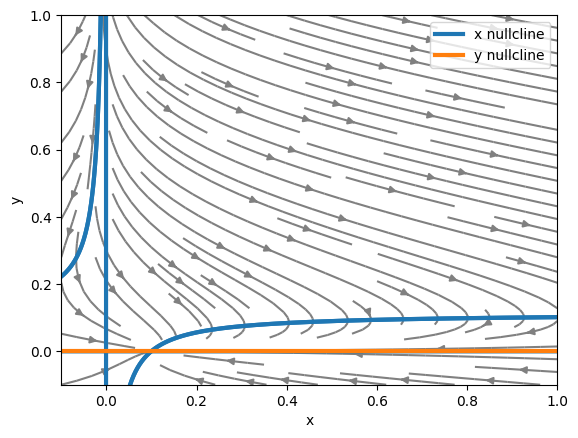

In [14]:
def dxdt_b1 (variables,parameters):
    x = variables['x']
    y = variables['y']
    dp0 = parameters['dp0']
    dp1 = parameters['dp1']
    return x*(dp0*y*(1-x/100)-dp1-y)
def dydt_b1 (variables,parameters):
    x = variables['x']
    y = variables['y']
    return y*(-x-1)
dxdt_b1_sp = x*(dp0*y*(1-x/100)-dp1-y)
dydt_b1_sp = y*(-x-1)
archetypeb1 =  DynamicModel2D('x',dxdt_b1,{'dp0':10,'dp1':1},'y',dydt_b1,{})
archetypeb1 = find_nullclines_and_update(archetypeb1,dxdt_b1_sp,dydt_b1_sp)
archetypeb1.plot_phase_portrait(0,20,20,[-0.1,1],[-0.1,1],['tab:blue','tab:orange'])
plt.show()

def dxdt_b2 (variables,parameters):
    eps = parameters['epsilon']
    return eps+dxdt_b1(variables,parameters)

dxdt_b2_sp = x*(dp0*y*(1-x/100)-dp1-y)+eps
archetypeb2 = DynamicModel2D('x',dxdt_b2,{'dp0':10,'dp1':1,'epsilon':0.1},'y',dydt_b1,{})
archetypeb2 = find_nullclines_and_update(archetypeb2,dxdt_b2_sp,dydt_b1_sp)
archetypeb2.plot_phase_portrait(0,20,20,[-0.1,1],[-0.1,1],['tab:blue','tab:orange'])


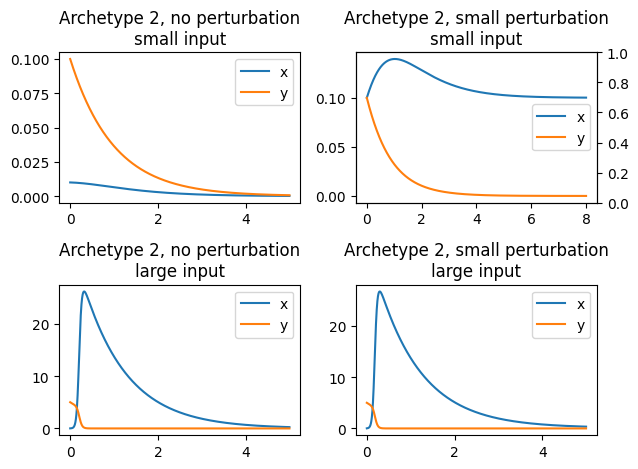

In [15]:
integ_b1_1 = archetypeb1.euler_integrate_keep_positive({'x':0.01,'y':0.1,'t':0},5,0.001)
integ_b1_2 = archetypeb1.euler_integrate_keep_positive({'x':0.01,'y':5,'t':0},5,0.001)

integ_b2_1 = archetypeb2.euler_integrate_keep_positive({'x':0.1,'y':0.1,'t':0},8,0.001)
integ_b2_2 = archetypeb2.euler_integrate_keep_positive({'x':0.02,'y':5,'t':0},5,0.001)

fig,axs = plt.subplots(ncols = 2, nrows = 2)
axs[0,0].plot(integ_b1_1['t'],integ_b1_1['x'],color = 'tab:blue',label = 'x')
axs[0,0].plot(integ_b1_1['t'],integ_b1_1['y'],color = 'tab:orange',label = 'y')
axs[0,0].legend()
axs[0,0].set_title('Archetype 2, no perturbation\nsmall input')

axs[1,0].plot(integ_b1_2['t'],integ_b1_2['x'],color = 'tab:blue',label = 'x')
axs[1,0].plot(integ_b1_2['t'],integ_b1_2['y'],color = 'tab:orange',label = 'y')
axs[1,0].legend()
axs[1,0].set_title('Archetype 2, no perturbation\nlarge input')

axs[0,1].plot(integ_b2_1['t'],integ_b2_1['x'],color = 'tab:blue',label = 'x')
ax = axs[0,1].twinx()
axs[0,1].plot(integ_b2_1['t'],integ_b2_1['y'],color = 'tab:orange',label = 'y')
axs[0,1].legend()
axs[0,1].set_title('Archetype 2, small perturbation\nsmall input')

axs[1,1].plot(integ_b2_2['t'],integ_b2_2['x'],color = 'tab:blue',label = 'x')
axs[1,1].plot(integ_b2_2['t'],integ_b2_2['y'],color = 'tab:orange',label = 'y')
axs[1,1].legend()
axs[1,1].set_title('Archetype 2, small perturbation\nlarge input')

fig.tight_layout()


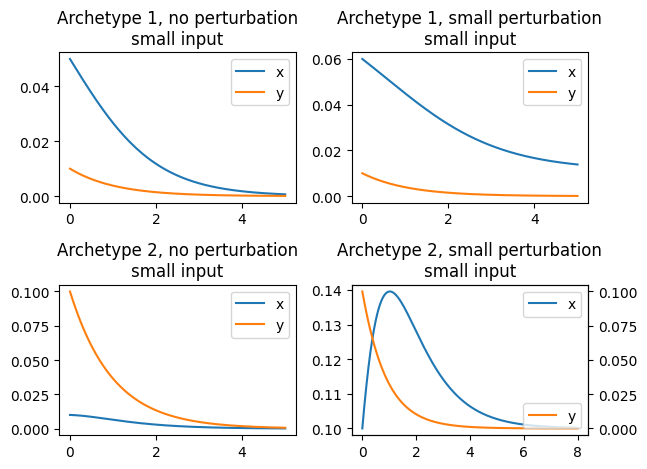

In [19]:
fig,axs = plt.subplots(ncols = 2, nrows = 2)
axs[0,0].plot(integ_a1_1['t'],integ_a1_1['x'],color = 'tab:blue',label = 'x')
axs[0,0].plot(integ_a1_1['t'],integ_a1_1['y'],color = 'tab:orange',label = 'y')
axs[0,0].legend()
axs[0,0].set_title('Archetype 1, no perturbation\nsmall input')
axs[0,1].plot(integ_a2_1['t'],integ_a2_1['x'],color = 'tab:blue',label = 'x')
axs[0,1].plot(integ_a2_1['t'],integ_a2_1['y'],color = 'tab:orange',label = 'y')
axs[0,1].legend()
axs[0,1].set_title('Archetype 1, small perturbation\nsmall input')

axs[1,0].plot(integ_b1_1['t'],integ_b1_1['x'],color = 'tab:blue',label = 'x')
axs[1,0].plot(integ_b1_1['t'],integ_b1_1['y'],color = 'tab:orange',label = 'y')
axs[1,0].legend()
axs[1,0].set_title('Archetype 2, no perturbation\nsmall input')

axs[1,1].plot(integ_b2_1['t'],integ_b2_1['x'],color = 'tab:blue',label = 'x')
ax = axs[1,1].twinx()
ax.plot(integ_b2_1['t'],integ_b2_1['y'],color = 'tab:orange',label = 'y')
axs[1,1].legend()
ax.legend(loc = 'lower right')
axs[1,1].set_title('Archetype 2, small perturbation\nsmall input')
fig.tight_layout()
fig.savefig('figures/perturbation_threshold_analysis.png',dpi=200)

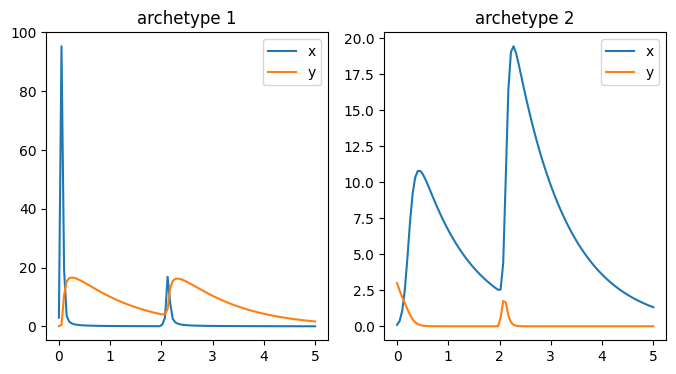

In [22]:
dp0 = 10
dp1 = 1
def dXdt_2 (X,t, dp0,dp1,u):
    x,y = X
    return [x*(dp0*y*(1 - x/100) - dp1)+u(t)[0],y*(-x - y - 1)+u(t)[1]]

def u2(t):
    if t>2 and t<2.1:
        return [0.1,30]
    else:
        return [0,0]
def u1(t):
    if t>2 and t<2.1:
        return [30,0.1]
    else:
        return [0,0]

def dXdt_1 (X,t,dp0,dp1,u):
    x,y = X
    return [x*(dp0*x*(1 - x/100) - dp1 - x*y)+u(t)[0],y*(x - 1)+u(t)[1]]

t = np.linspace(0,5,100)   
ret2 = odeint(dXdt_2,[0.1,3],t,args = (dp0,dp1,u2),tcrit = [0,2])

ret1 = odeint(dXdt_1,[3,0.1],t,args = (dp0,dp1,u1),tcrit = [0,2])
fig,axs = plt.subplots(ncols = 2,figsize = (8,4))
axs[0].plot(t,ret1[:,0],label = 'x')
axs[0].plot(t,ret1[:,1],label = 'y')
axs[0].legend()
axs[0].set_title('archetype 1')
axs[1].plot(t,ret2[:,0],label = 'x')
axs[1].plot(t,ret2[:,1],label = 'y')
axs[1].legend()
axs[1].set_title('archetype 2')
fig.savefig('figures/refractory_period_analysis.png',dpi = 200)

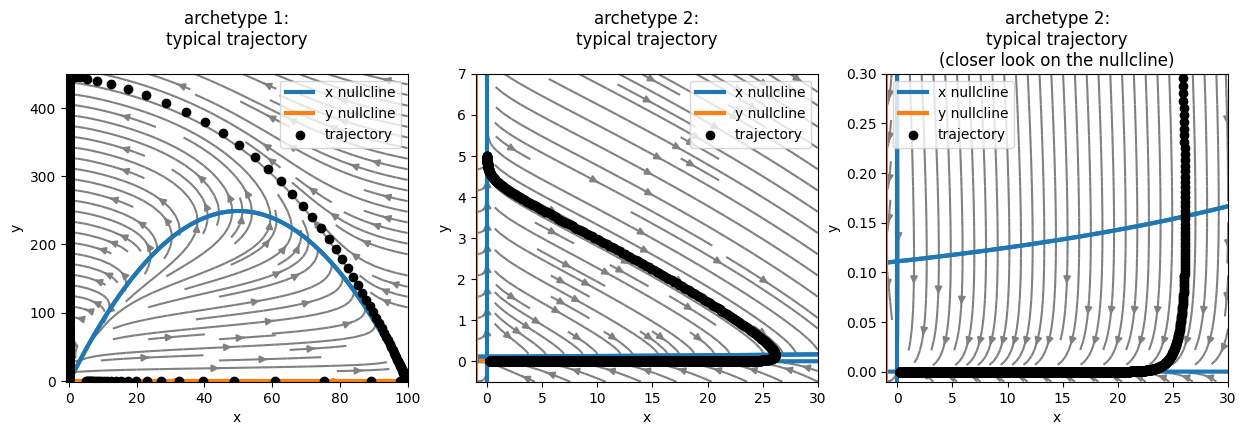

In [29]:
fig,axs = plt.subplots (ncols = 3, figsize = (15,4))
archetypea1.plot_phase_portrait(0,20,20,[-1,100],[-1,450],['tab:blue','tab:orange'],fig = fig, ax = axs[0])
archetypea1.plot_track_on_phase_space(integ_a1_2,['x','y'],fig = fig, ax = axs[0], color = 'black',label = 'trajectory')
axs[0].legend(loc = 'upper right')
axs[0].set_title('archetype 1:\ntypical trajectory\n ')
archetypeb1.plot_phase_portrait(0,20,20,[-1,30],[-0.5,7],['tab:blue','tab:orange'],fig = fig, ax = axs[1])
archetypeb1.plot_track_on_phase_space(integ_b1_2,['x','y'],fig = fig, ax = axs[1], color = 'black',label = 'trajectory')
axs[1].legend(loc = 'upper right')

axs[1].set_title('archetype 2:\ntypical trajectory\n ')
archetypeb1.plot_phase_portrait(0,20,20,[-1,30],[-0.01,0.3],['tab:blue','tab:orange'],fig = fig, ax = axs[2])
archetypeb1.plot_track_on_phase_space(integ_b1_2,['x','y'],fig = fig, ax = axs[2], color = 'black',label = 'trajectory')
axs[2].set_title('archetype 2:\ntypical trajectory\n(closer look on the nullcline)')
axs[2].legend(loc = 'upper left')

fig.savefig('figures/refractory_period_analysis_typical_trajectories.png',dpi = 200,bbox_inches = 'tight')

In [ ]:
import pandas as pd

# Assuming df1, df2, df3, and df4 are your existing dataframes
df_names = [f'../five_interactions/data/row{i}.csv' for i in range(1,9)]
dfs = [pd.read_csv(df_name) for df_name in df_names]
# Step 1: Merge the dataframes using an outer join to ensure all columns are included
merged_df = pd.concat(dfs, axis=0, join='outer', ignore_index=True)

# Concatenate 'remarks' while handling multiple remarks columns
merged_df['remarks'] = merged_df['remarks'].fillna('').astype(str)

# Step 3: Combine remarks columns across the original dataframes
merged_df['remarks'] = merged_df.groupby(merged_df.index)['remarks'].transform(lambda x: ' '.join(filter(None, x)))

# Drop duplicate rows that may have been formed during concatenation
merged_df = merged_df.drop_duplicates()

column_order = ['prod_x_item_1', 'prod_x_item_2','prod_x_item_3', 'rem_x_item_1', 'rem_x_item_2','rem_x_item_3', 
                'prod_y_item_1', 'rem_y_item_1', 'rem_y_item_2','rem_y_item_3', 'remarks','parameter_range']

# Reorder the dataframe
merged_df = merged_df[column_order]

# Display the rearranged dataframe
print(merged_df.to_string())


     prod_x_item_1 prod_x_item_2 prod_x_item_3 rem_x_item_1 rem_x_item_2 rem_x_item_3 prod_y_item_1 rem_y_item_1 rem_y_item_2 rem_y_item_3                                                                                                                   remarks                              parameter_range
0                1           NaN           NaN            1          NaN          NaN           NaN            1            x            y                                                                                zero behaviour of x at origin,no feedback,                                          NaN
1                1           NaN           NaN            1          NaN          NaN           NaN            1            x          x*y                                                                                zero behaviour of x at origin,no feedback,                                          NaN
2                1           NaN           NaN            1          NaN          

In [39]:
dp0 = 10
dp1 = 1

In [35]:
from Base.Combo_CC_Base import Combo_CC
cms_remain = []
counter = 0
pars_dicts = []
xlims = []
ylims = []
df = merged_df
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        prod_x = df.iloc[i][['prod_x_item_1','prod_x_item_2','prod_x_item_3']].dropna().values
        rem_x = df.iloc[i][['rem_x_item_1','rem_x_item_2','rem_x_item_3']].dropna().values
        prod_y = df.iloc[i][['prod_y_item_1']].dropna().values
        rem_y = df.iloc[i][['rem_y_item_1','rem_y_item_2','rem_y_item_3']].dropna().values

        cm = Combo_CC(prod_x,rem_x,prod_y,rem_y,parameter_placement='x',CC_y = None)
        cms_remain.append(cm)
        print(f'{counter} dx/dt = {cm.P} dy/dt = {cm.Q}')
        counter+=1

cms_arc1 = [cms_remain[i] for i in [54,55,56]]
cms_arc2 = cms_remain

print(len(cms_arc1))
print(len(cms_arc2))
cms_arc2_to_plot = [cms_arc2[i] for i in [0,38,53]]


0 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - 1)
2 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - 1)
3 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y**2 - 1)
4 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - y - 1)
5 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - y - 1)
6 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x*y - 1)
7 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - y**2 - 1)
8 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - y**2 - 1)
9 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - y)
10 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - y)
11 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y**2 - y)
12 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - y**2)
13 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - y**2)
14 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x*y - y)
15 dx/dt = x*(dp0*y*(1 - x/

a1_1 0.01
a1_2 0.01
a1_3 0.01
a2_1 0.01
a2_2 0.01
a2_3 0.01
a1_1 0.01438449888287663
a1_2 0.01438449888287663
a1_3 0.01438449888287663
a2_1 0.01438449888287663
a2_2 0.01438449888287663
a2_3 0.01438449888287663
a1_1 0.0206913808111479
a1_2 0.0206913808111479
a1_3 0.0206913808111479
a2_1 0.0206913808111479
a2_2 0.0206913808111479
a2_3 0.0206913808111479
a1_1 0.029763514416313176
a1_2 0.029763514416313176
a1_3 0.029763514416313176
a2_1 0.029763514416313176
a2_2 0.029763514416313176
a2_3 0.029763514416313176
a1_1 0.04281332398719394
a1_2 0.04281332398719394
a1_3 0.04281332398719394
a2_1 0.04281332398719394
a2_2 0.04281332398719394
a2_3 0.04281332398719394
a1_1 0.06158482110660264
a1_2 0.06158482110660264
a1_3 0.06158482110660264
a2_1 0.06158482110660264
a2_2 0.06158482110660264
a2_3 0.06158482110660264
a1_1 0.08858667904100823
a1_2 0.08858667904100823
a1_3 0.08858667904100823
a2_1 0.08858667904100823
a2_2 0.08858667904100823
a2_3 0.08858667904100823
a1_1 0.12742749857031335
a1_2 0.12742749

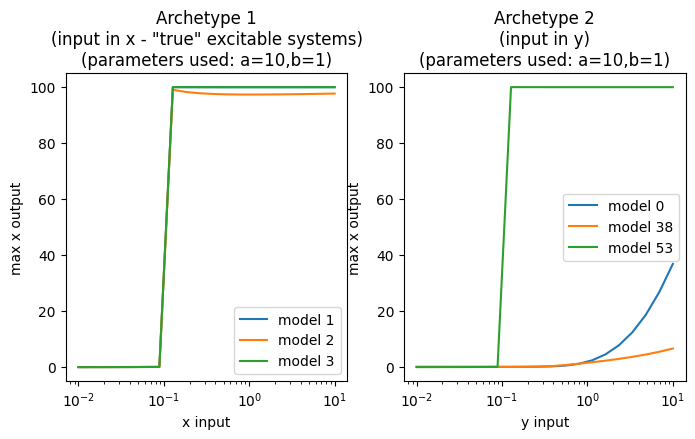

In [42]:
input = np.logspace(-2,1,20)

cm_ode_arc1_1 = Combo_ODE(cms_arc1[0],{cms_arc1[0].params[0]:dp0,cms_arc1[0].params[1]:dp1})
cm_ode_arc1_2 = Combo_ODE(cms_arc1[1],{cms_arc1[1].params[0]:dp0,cms_arc1[1].params[1]:dp1})
cm_ode_arc1_3 = Combo_ODE(cms_arc1[2],{cms_arc1[2].params[0]:dp0,cms_arc1[2].params[1]:dp1})
    
cm_ode_arc2_1 = Combo_ODE(cms_arc2_to_plot[0],{cms_arc2_to_plot[0].params[0]:dp0,cms_arc2_to_plot[0].params[1]:dp1})
cm_ode_arc2_2 = Combo_ODE(cms_arc2_to_plot[1],{cms_arc2_to_plot[1].params[0]:dp0,cms_arc2_to_plot[1].params[1]:dp1})
cm_ode_arc2_3 = Combo_ODE(cms_arc2_to_plot[2],{cms_arc2_to_plot[2].params[0]:dp0,cms_arc2_to_plot[2].params[1]:dp1})

x_maxs_a1_1 = []
x_maxs_a1_2 = []
x_maxs_a1_3 = []

x_maxs_a2_1 = []
x_maxs_a2_2 = []
x_maxs_a2_3 = []

for inp in input:
    intg_a1_1 = cm_ode_arc1_1.integrate([inp,0.1],2,0.001)
    print('a1_1',inp)
    x_maxs_a1_1.append(intg_a1_1['x'].max())
    intg_a1_2 = cm_ode_arc1_2.integrate([inp,0.1],2,0.001)
    print('a1_2',inp)
    x_maxs_a1_2.append(intg_a1_2['x'].max())
    intg_a1_3 = cm_ode_arc1_3.integrate([inp,0.1],2,0.001)
    print('a1_3',inp)
    x_maxs_a1_3.append(intg_a1_3['x'].max())

    intg_a2_1 = cm_ode_arc2_1.integrate([0.1,inp],2,0.001)
    print('a2_1',inp)
    x_maxs_a2_1.append(intg_a2_1['x'].max())
    intg_a2_2 = cm_ode_arc2_2.integrate([0.1,inp],2,0.001)
    print('a2_2',inp)
    x_maxs_a2_2.append(intg_a2_2['x'].max())
    intg_a2_3 = cm_ode_arc2_3.integrate([0.1,inp],2,0.001)
    print('a2_3',inp)
    x_maxs_a2_3.append(intg_a2_3['x'].max())



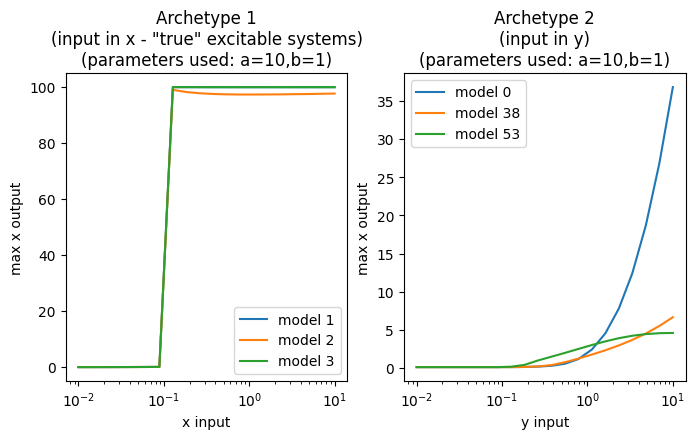

In [45]:
fig, axs = plt.subplots(ncols = 2, figsize = (8,4))
axs[0].plot(input,x_maxs_a1_1,label = 'model 1')
axs[0].plot(input,x_maxs_a1_2,label = 'model 2')
axs[0].plot(input,x_maxs_a1_3,label = 'model 3')
axs[0].set_xscale('log')
axs[0].set_xlabel('x input')
axs[0].set_ylabel('max x output')
axs[0].set_title(f'Archetype 1\n(input in x - "true" excitable systems)\n(parameters used: a={dp0},b={dp1})')
axs[0].legend()

axs[1].plot(input,x_maxs_a2_1,label = 'model 0')
axs[1].plot(input,x_maxs_a2_2,label = 'model 38')
axs[1].plot(input,x_maxs_a2_3,label = 'model 53')
axs[1].set_xscale('log')
axs[1].set_xlabel('y input')
axs[1].set_ylabel('max x output')
axs[1].set_title(f'Archetype 2\n(input in y)\n(parameters used: a={dp0},b={dp1})')
axs[1].legend()

fig.savefig('figures/sensitivity_comparison.png',dpi = 200,bbox_inches = 'tight')